###  Autor: Lilian Rebeca Carrera Lemus 
No. Carnet: 20008077  


# Práctica No. 2: PCA y t-SNE - Reducción de Dimensionalidad

Usando el dataset de fashion MNIST realizar:
* PCA sin sklearn para reducir a 2 dimensiones.
    * Anotar la cantidad de varianza preservada.
* t-sne con sklearn para reducir a 2 dimensiones.
* Analizar ambas representaciones, comparar y concluir.
* Aplicar clustering con sklearn sobre la representación reducida. 
* Ya que este dataset si posee etiquetas “y” (razas) analizar si los clusters encontrados tienden a agrupar la misma raza o razas similares.
* Agregar conclusiones finales. 

In [22]:
#Importar liberías necesarias
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Dataset a Utilizar**
El data set de fashion M-NIST de Keras está distribuido en un conjunto de imagenes en escala de grises de 28x28 píxeles. Todas estas imagenes tienen una etiqueta para formar entrenamientos de la forma (x, y).

In [2]:
#Cargamos los datos
ds_fashion_mnist = keras.datasets.fashion_mnist 

#Obtenemos los datos para entrenamiento
(train_images, train_labels), (_, _) = ds_fashion_mnist.load_data()

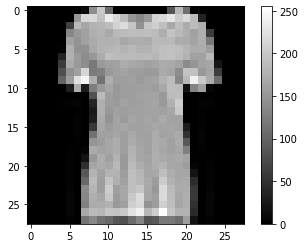

In [3]:
#Obtenemos una imagen de muestra
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Implementación PCA

Definimos una función para PCA sin sklearn para reducir a 2 dimensiones mediante la determinación de los mejores vectores base para la nueva representación de los datos. 

In [4]:
#Antes de definir la función convertimos los datos (que está en 3 dimensiones) a una matriz, 
#donde cada fila representará una prenda.
d_imagenes = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2])
d_imagenes.shape

(60000, 784)

In [5]:
def funcion_PCA(df_imagenes):
    #Normalizar datos
    df_normalizado = StandardScaler().fit_transform(df_imagenes)

    #Calculo de covarianza, eigenvectores y eigenvalores
    cov_mat = np.cov(df_normalizado.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    varianza_total = np.sum(eig_vals)

    #Lista de igenvalues y su eigenvector
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Ordernar descendentemente
    eig_pairs.sort()
    eig_pairs.reverse()

    #Matriz de valorespropios y la varianza
    matrix_w = np.hstack((eig_pairs[0][1].reshape(eig_vals.shape[0],1), 
                          eig_pairs[1][1].reshape(eig_vals.shape[0],1)))
    
    #Varianza por par de vectores
    varianza = eig_pairs[0][0] + eig_pairs[1][0]
    
    #Varianza preservada
    varianza_preservada = varianza / varianza_total
    
    #Nuevas dimensiones (2D)
    y = df_normalizado.dot(matrix_w)

    #Se muestra la representacion en 2d
    plt.scatter(y[:,0], y[:,1], color='purple', s=2)
    plt.show()
    
    return y, varianza_preservada

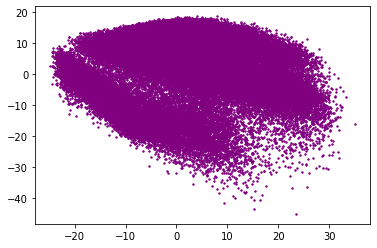

In [6]:
pca, varianza_preservada = funcion_PCA(d_imagenes)

In [7]:
print('La varianza preservada es de: ', varianza_preservada)

La varianza preservada es de:  0.36498179910702233


## Implementar t-SNE  
Implementar t-sne con sklearn para reducir a 2 dimensiones.

In [8]:
#como paso previo a realizar el entrenamiento vamos a normalizar los datos
d_normalizada = StandardScaler().fit_transform(d_imagenes)

In [9]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
salida_tsne = tsne.fit_transform(d_normalizada)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 35.334s...
[t-SNE] Computed neighbors for 60000 samples in 4091.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

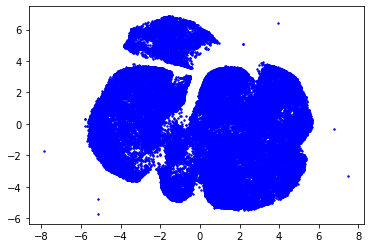

In [10]:
#Visualizamos los resultados
plt.scatter(salida_tsne[:,0], salida_tsne[:,1], color='blue', s=2)
plt.show()

### Comparación PCA y t-SNE  
Al comparar las dos visualizaciones (de PCA y de t-SNE), notamos que t-SNE transforma aun más la data y se notan más las separaciones que las que hace PCA. Sin embargo, t-SNE es mucho más costoso computacionalmente, en mi caso el tiempo de ejecución para estos datos fue de 45 minutos.

## Aplicación de Clustering
Aplicar clustering con sklearn sobre la representación reducida.

In [15]:
def clustering(df_imagenes, k=10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(df_imagenes)
    plt.scatter(df_imagenes[:,0], df_imagenes[:,1], c=y_kmeans, cmap='Paired', s=2)

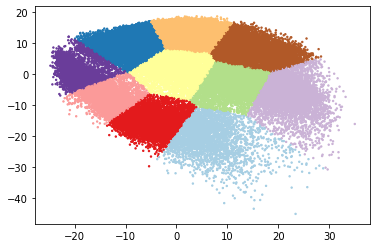

In [16]:
#Aplicamos Clustering a los resultados obtenidos con pca
clustering(pca)

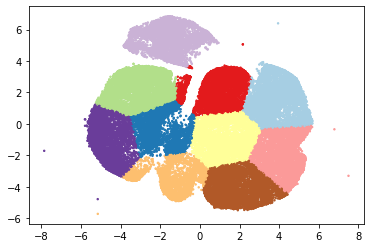

In [17]:
#Aplicamos Clustering a los resultados obtenidos con t-SNE
clustering(salida_tsne)

## Agrupación con Etiquetas
Ya que este dataset si posee etiquetas “y” (razas) analizar si los clusters encontrados tienden a agrupar la misma raza o razas similares.

In [26]:
label_dictionary = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [28]:
label_names = list()
for i in train_labels:
    x = label_dictionary.get(i)
    label_names.append(x)

**Para resultados obtenidos con PCA:**

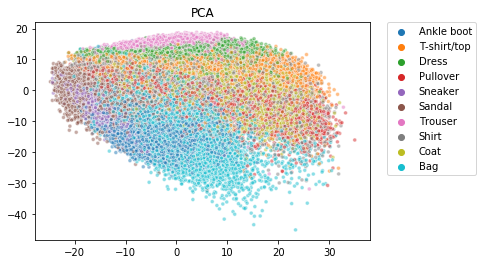

In [39]:
sns.scatterplot(x = pca[:,0], y = pca[:,1], hue = label_names, s = 15, alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PCA")
plt.show()

**Para resultados obtenidos con t-SNE:**

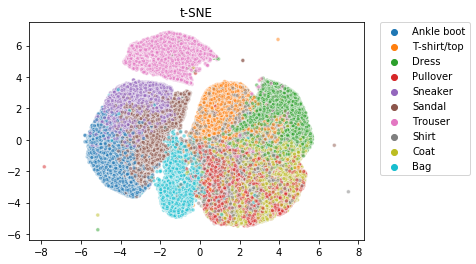

In [40]:
sns.scatterplot(x = salida_tsne[:,0], y = salida_tsne[:,1], hue = label_names, s = 15, alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("t-SNE")
plt.show()

Se observa que hay cierta tendencia de agrupar ciertos grupos con caraceterísticas similares juntos, como es el caso de todas las imágenes correspondientes a calzado.

## Conclusiones

* Se pudo observar que t-NSE fue más efectivo que PCA, ya que realizó un mejor trabajo de separación de clusters y es mas facil de distinguir los grupos, sin embargo este es muy costoso computacionalmente hablando. 
* Ambos algoritmos resultan en asociaciones diferentes a sus labels respectivos, esto debido a que los datos ha sufrido una transformación fuerte para ser mostrada en una sola gráfica de dos dimensiones.
* Es interesante observar que t-SNE agrupa varias prendas que tienen características parecidas en grupos delimitados. Por ejemplo, se observa que la mayoría de Sandals, sneakers y ankle boots, se encuentran agrupados. De igual manera, los pullovers, y los coats, que tienen aspecto muy similar, no se encuentran bien delimitados.